# Derivative of Arinyo parameters

In [1]:
# %load first_cell.py
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import black
import jupyter_black

jupyter_black.load(
    lab=False,
    line_length=79,
    verbosity="DEBUG",
    target_version=black.TargetVersion.PY310,
)

import numpy as np
import os
import sys
import matplotlib.pyplot as plt

from astropy.cosmology import FlatLambdaCDM

cosmo = FlatLambdaCDM(H0=67.26, Om0=0.314, Ob0=0.049)

from matplotlib import rcParams
rcParams["mathtext.fontset"] = "stix"
rcParams["font.family"] = "STIXGeneral"


def print_shape(*args):
    nelem = len(args)
    for ii in range(nelem - 1):
        print(args[ii].shape, end=" ")
    print(args[nelem - 1].shape)


def ls_level(folder, nlevels):
    for ii in range(nlevels):
        folder = os.path.dirname(folder)
    folder += "/"
    return folder


path_program = ls_level(os.getcwd(), 1)
print(path_program)
sys.path.append(path_program)

DEBUG:jupyter_black:config: {'line_length': 79, 'target_versions': {<TargetVersion.PY310: 10>}}


<IPython.core.display.Javascript object>

/home/jchaves/Proyectos/projects/lya/lya_pk/


In [2]:
from lya_pk.model_p3d_arinyo import ArinyoModel
from lace.cosmo.camb_cosmo import get_cosmology

### Set Arinyo model

In [3]:
zz = np.zeros(1) + 3
cosmo = get_cosmology()
arinyo = ArinyoModel(cosmo=cosmo, zs=zz)

### Compute P3D

In [4]:
nk = 50
nmu = 5
kk = np.zeros((nk, nmu))
mu = np.zeros((nk, nmu))
kk[...] = np.logspace(-0.5, 1.2, nk)[:, np.newaxis]
mu[...] = np.linspace(0, 1, nmu)[np.newaxis, :]
p3d = arinyo.P3D_Mpc(zz[0], kk, mu)

### Plot P3D

<IPython.core.display.Javascript object>


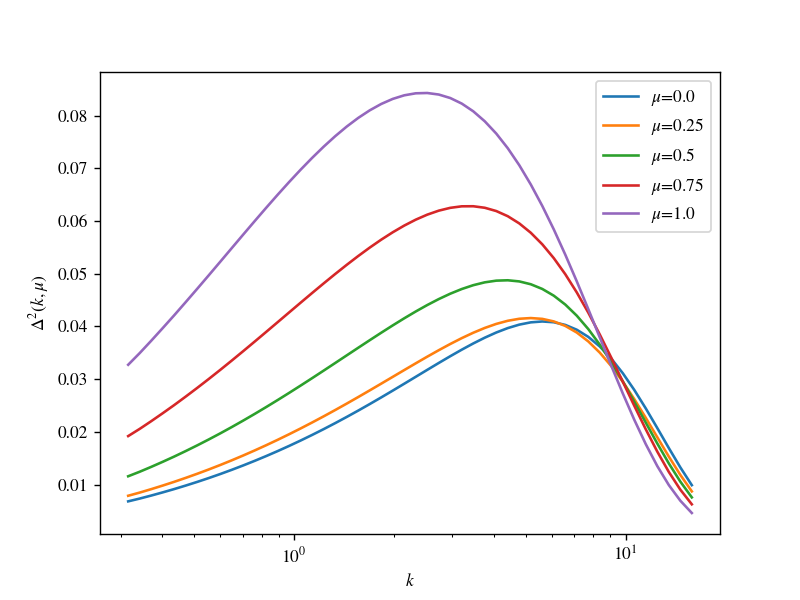

In [5]:
for imu in range(nmu):
    yy = kk[:, imu] ** 3 * p3d[:, imu] / 2 / np.pi**2
    plt.plot(kk[:, imu], yy, label=r"$\mu$=" + str(mu[0, imu]))
plt.xlabel(r"$k$")
plt.ylabel(r"$\Delta^2(k, \mu)$")
plt.xscale("log")
plt.legend()

### Compute and plot derivatives

#### bias

<IPython.core.display.Javascript object>


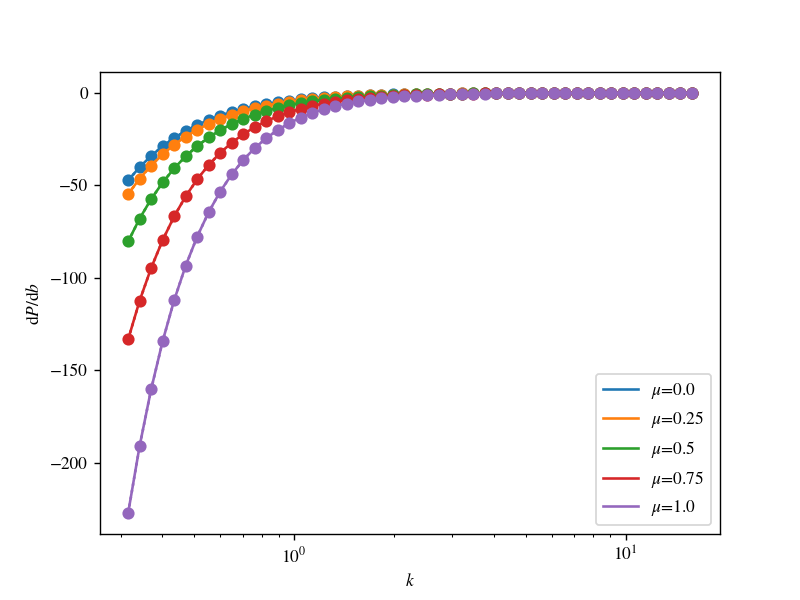

In [21]:
par = "bias"
defpar = arinyo.default_params[par]
hh = defpar * 1e-3
forw = arinyo.P3D_Mpc(zz[0], kk, mu, parameters={par: defpar + hh})
num = (forw - p3d) / hh

theo = arinyo.dp3d_dbias_p3d() * p3d

plt.close()
for imu in range(nmu):
    col = "C" + str(imu)
    plt.plot(kk[:, imu], num[:, imu], col + "o:")
    plt.plot(kk[:, imu], theo[:, imu], col, label=r"$\mu$=" + str(mu[0, imu]))
plt.xlabel(r"$k$")
plt.ylabel(r"$\mathrm{d}P/\mathrm{d}b$")
plt.xscale("log")
plt.legend()

#### beta

<IPython.core.display.Javascript object>


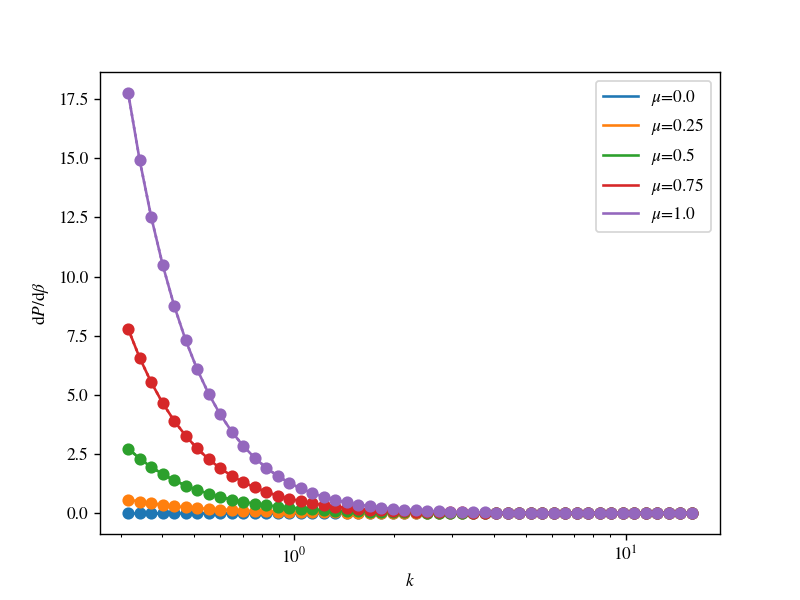

In [22]:
par = "beta"
defpar = arinyo.default_params[par]
hh = defpar * 1e-3
forw = arinyo.P3D_Mpc(zz[0], kk, mu, parameters={par: defpar + hh})
num = (forw - p3d) / hh

theo = arinyo.dp3d_dbeta_p3d(mu) * p3d

plt.close()
for imu in range(nmu):
    col = "C" + str(imu)
    plt.plot(kk[:, imu], num[:, imu], col + "o:")
    plt.plot(kk[:, imu], theo[:, imu], col, label=r"$\mu$=" + str(mu[0, imu]))
plt.xlabel(r"$k$")
plt.ylabel(r"$\mathrm{d}P/\mathrm{d}\beta$")
plt.xscale("log")
plt.legend()

#### q1

<IPython.core.display.Javascript object>


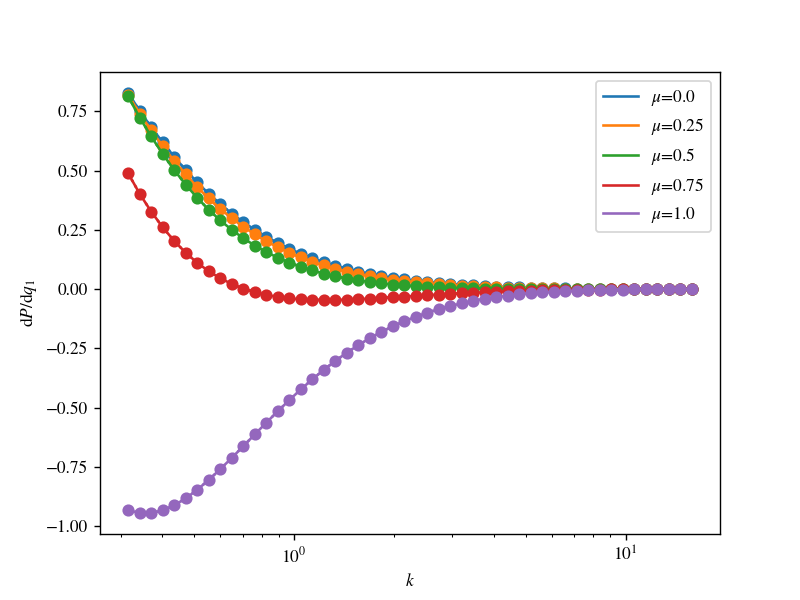

In [5]:
par = "q1"
defpar = arinyo.default_params[par]
hh = defpar * 1e-3
forw = arinyo.P3D_Mpc(zz[0], kk, mu, parameters={par: defpar + hh})
num = (forw - p3d) / hh

delta2 = arinyo.delta2(zz[0], kk)
theo = arinyo.dp3d_dq1_p3d(kk, mu, delta2) * p3d

plt.close()
for imu in range(nmu):
    col = "C" + str(imu)
    plt.plot(kk[:, imu], num[:, imu], col + "o:")
    plt.plot(kk[:, imu], theo[:, imu], col, label=r"$\mu$=" + str(mu[0, imu]))
plt.xlabel(r"$k$")
plt.ylabel(r"$\mathrm{d}P/\mathrm{d}q_1$")
plt.xscale("log")
plt.legend()

#### q2

<IPython.core.display.Javascript object>


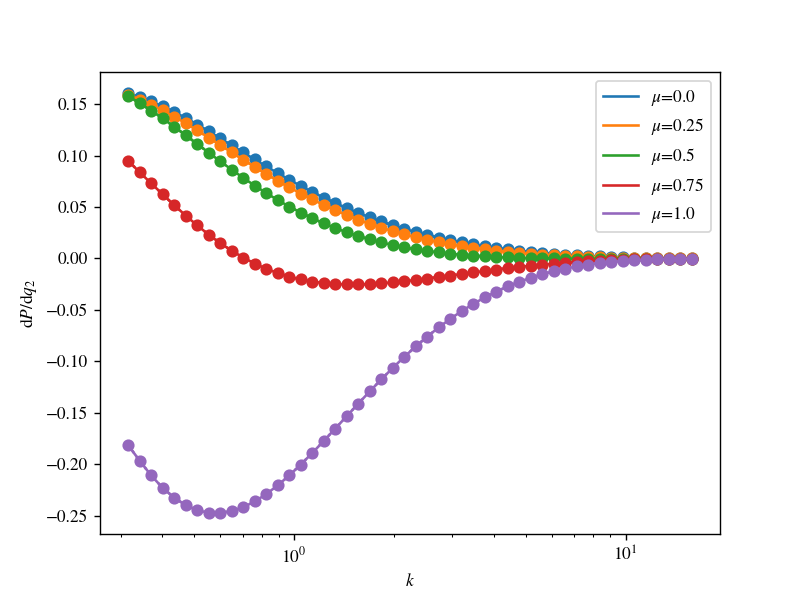

In [8]:
par = "q2"
defpar = arinyo.default_params[par]
hh = defpar + 1e-3 # default value is zero
forw = arinyo.P3D_Mpc(zz[0], kk, mu, parameters={par: defpar + hh})
num = (forw - p3d) / hh

delta2 = arinyo.delta2(zz[0], kk)
theo = arinyo.dp3d_dq2_p3d(kk, mu, delta2) * p3d

plt.close()
for imu in range(nmu):
    col = "C" + str(imu)
    plt.plot(kk[:, imu], num[:, imu], col + "o:")
    plt.plot(kk[:, imu], theo[:, imu], col, label=r"$\mu$=" + str(mu[0, imu]))
plt.xlabel(r"$k$")
plt.ylabel(r"$\mathrm{d}P/\mathrm{d}q_2$")
plt.xscale("log")
plt.legend()

#### av

<IPython.core.display.Javascript object>


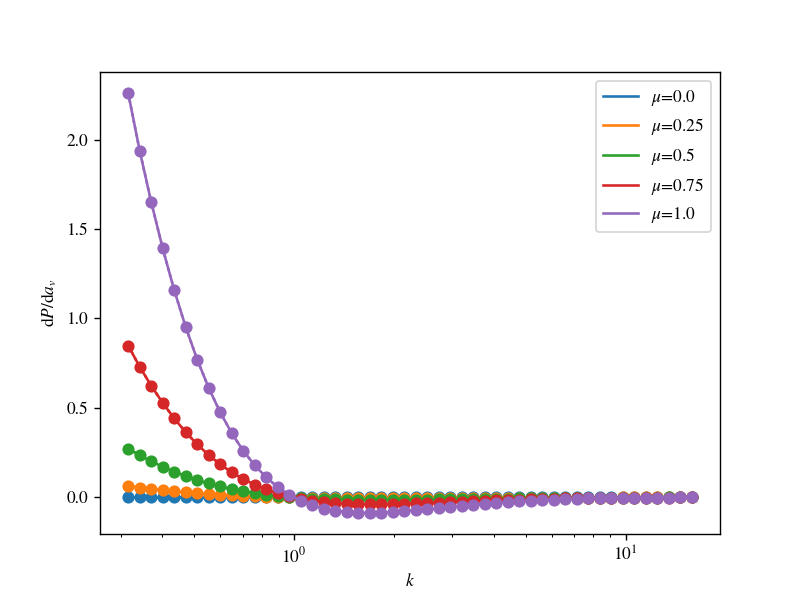

In [9]:
par = "av"
defpar = arinyo.default_params[par]
hh = defpar * 1e-3
forw = arinyo.P3D_Mpc(zz[0], kk, mu, parameters={par: defpar + hh})
num = (forw - p3d) / hh

delta2 = arinyo.delta2(zz[0], kk)
theo = arinyo.dp3d_dav_p3d(kk, mu, delta2) * p3d

plt.close()
for imu in range(nmu):
    col = "C" + str(imu)
    plt.plot(kk[:, imu], num[:, imu], col + "o:")
    plt.plot(kk[:, imu], theo[:, imu], col, label=r"$\mu$=" + str(mu[0, imu]))
plt.xlabel(r"$k$")
plt.ylabel(r"$\mathrm{d}P/\mathrm{d}a_v$")
plt.xscale("log")
plt.legend()

#### kvav

<IPython.core.display.Javascript object>


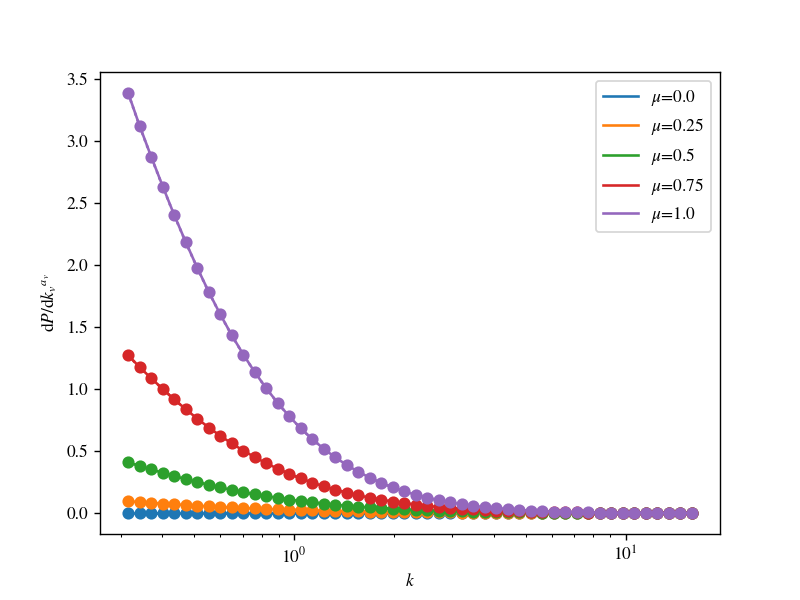

In [10]:
par = "kvav"
defpar = arinyo.default_params[par]
hh = defpar * 1e-3
forw = arinyo.P3D_Mpc(zz[0], kk, mu, parameters={par: defpar + hh})
num = (forw - p3d) / hh

delta2 = arinyo.delta2(zz[0], kk)
theo = arinyo.dp3d_dkvav_p3d(kk, mu, delta2) * p3d

plt.close()
for imu in range(nmu):
    col = "C" + str(imu)
    plt.plot(kk[:, imu], num[:, imu], col + "o:")
    plt.plot(kk[:, imu], theo[:, imu], col, label=r"$\mu$=" + str(mu[0, imu]))
plt.xlabel(r"$k$")
plt.ylabel(r"$\mathrm{d}P/\mathrm{d}{k_v}^{a_v}$")
plt.xscale("log")
plt.legend()

#### bv

It breaks for mu=0!!

/home/jchaves/miniconda3/envs/general/lib/python3.9/site-packages/lya_pk-1.0-py3.9.egg/lya_pk/model_p3d_arinyo.py:356: RuntimeWarning: divide by zero encountered in log
/home/jchaves/miniconda3/envs/general/lib/python3.9/site-packages/lya_pk-1.0-py3.9.egg/lya_pk/model_p3d_arinyo.py:356: RuntimeWarning: invalid value encountered in multiply


<IPython.core.display.Javascript object>


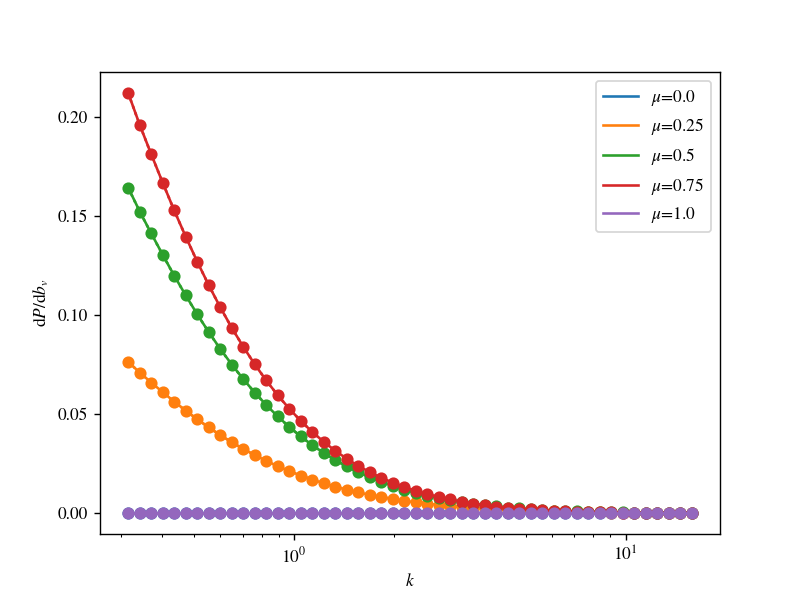

In [11]:
par = "bv"
defpar = arinyo.default_params[par]
hh = defpar * 1e-3
forw = arinyo.P3D_Mpc(zz[0], kk, mu, parameters={par: defpar + hh})
num = (forw - p3d) / hh

delta2 = arinyo.delta2(zz[0], kk)
theo = arinyo.dp3d_dbv_p3d(kk, mu, delta2) * p3d

plt.close()
for imu in range(nmu):
    col = "C" + str(imu)
    plt.plot(kk[:, imu], num[:, imu], col + "o:")
    plt.plot(kk[:, imu], theo[:, imu], col, label=r"$\mu$=" + str(mu[0, imu]))
plt.xlabel(r"$k$")
plt.ylabel(r"$\mathrm{d}P/\mathrm{d}b_v$")
plt.xscale("log")
plt.legend()

#### kp

<IPython.core.display.Javascript object>


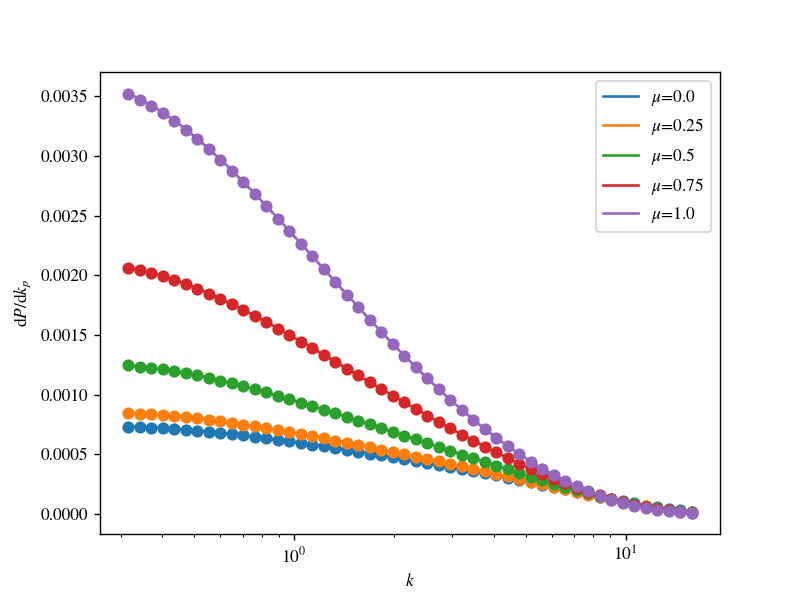

In [6]:
par = "kp"
defpar = arinyo.default_params[par]
hh = defpar * 1e-3
forw = arinyo.P3D_Mpc(zz[0], kk, mu, parameters={par: defpar + hh})
num = (forw - p3d) / hh

theo = arinyo.dp3d_dkp_p3d(kk) * p3d

plt.close()
for imu in range(nmu):
    col = "C" + str(imu)
    plt.plot(kk[:, imu], num[:, imu], col + "o:")
    plt.plot(kk[:, imu], theo[:, imu], col, label=r"$\mu$=" + str(mu[0, imu]))
plt.xlabel(r"$k$")
plt.ylabel(r"$\mathrm{d}P/\mathrm{d}k_p$")
plt.xscale("log")
plt.legend()